In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [123]:
df = pd.read_csv("kc_house_data.csv")

In [124]:
# посчитаем среднюю цену по каждому почтовому индексу и отсортируем по возрастанию
averaged_by_zipcodes = df.groupby(['zipcode'], as_index=False).price.agg({'mean_price': np.mean})\
                        .sort_values(['mean_price'], ascending=True)

In [125]:
# все сделки с самым "дешевым" индексом 
cheap = df[df.zipcode == int(averaged_by_zipcodes.head(1).zipcode)]

In [126]:
cheap.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.990000e+02,199,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.0,199.000000,...,199.000000,199.000000,199.000000,199.000000,199.000000,199.0,199.000000,199.000000,199.000000,199.000000
unique,NaN,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140620T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.850894e+09,NaN,234284.035176,3.326633,1.839196,1627.743719,7517.633166,1.334171,0.0,0.010050,...,6.693467,1522.537688,105.206030,1967.773869,59.889447,98002.0,47.308780,-122.213357,1479.030151,7585.482412
std,3.039520e+09,NaN,52041.448659,0.903888,0.738905,538.972544,3307.698822,0.446805,0.0,0.141776,...,0.682766,508.824142,272.888982,29.291881,340.528967,0.0,0.021246,0.011966,411.748525,5319.737463
min,1.000102e+06,NaN,95000.000000,1.000000,0.750000,690.000000,2800.000000,1.000000,0.0,0.000000,...,5.000000,690.000000,0.000000,1908.000000,0.000000,98002.0,47.276100,-122.229000,860.000000,2800.000000
25%,1.921059e+09,NaN,199975.000000,3.000000,1.000000,1215.000000,5265.000000,1.000000,0.0,0.000000,...,6.000000,1150.000000,0.000000,1953.000000,0.000000,98002.0,47.289800,-122.219000,1160.000000,5459.500000
50%,5.125400e+09,NaN,235000.000000,3.000000,1.750000,1570.000000,7282.000000,1.000000,0.0,0.000000,...,7.000000,1440.000000,0.000000,1966.000000,0.000000,98002.0,47.306300,-122.215000,1410.000000,7316.000000
75%,7.349400e+09,NaN,268500.000000,4.000000,2.250000,1984.000000,8896.500000,2.000000,0.0,0.000000,...,7.000000,1802.500000,0.000000,1990.500000,0.000000,98002.0,47.323100,-122.210000,1700.000000,8552.000000


In [127]:
features = ['bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors', 'condition',
            'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

In [128]:
X_train, X_test, y_train, y_test = \
    train_test_split(cheap[features], cheap[['price']], test_size=0.33, random_state=42)

In [129]:
from sklearn.preprocessing import StandardScaler

In [131]:
scaler = StandardScaler()
scaler.fit(cheap[features])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [132]:
from sklearn import linear_model

In [133]:
# Линейная регрессия на одном признаке
reg_one = linear_model.LinearRegression()
reg_one.fit(X_train[['sqft_living']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [134]:
# Линейная регрессия по всем признакам
reg_m = linear_model.LinearRegression()
reg_m.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [151]:
# Линейная регрессия с L1 регуляризацией - Лассо
reg_lasso = linear_model.Lasso(alpha=5000, max_iter=10000)
reg_lasso.fit(scaler.transform(X_train), y_train)

Lasso(alpha=5000, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [152]:
print('Обучающая выборка')
print('MAE LinearRegression с одним признаком:\t\t %d' % mean_absolute_error(y_train, reg_one.predict(X_train[['sqft_living']])))
print('MAE LinearRegression с многими признаками:\t %d' % mean_absolute_error(y_train, reg_m.predict(X_train)))
print('MAE Lasso с многими признаками:\t\t\t %d' % mean_absolute_error(y_train, reg_lasso.predict(scaler.transform(X_train))))
print('Тестовая выборка')
print('MAE LinearRegression с одним признаком:\t\t %d' % mean_absolute_error(y_test, reg_one.predict(X_test[['sqft_living']])))
print('MAE LinearRegression с многими признаками:\t %d' % mean_absolute_error(y_test, reg_m.predict(X_test)))
print('MAE Lasso с многими признаками:\t\t\t %d' % mean_absolute_error(y_test, reg_lasso.predict(scaler.transform(X_test))))

Обучающая выборка
MAE LinearRegression с одним признаком:		 26520
MAE LinearRegression с многими признаками:	 21559
MAE Lasso с многими признаками:			 22273
Тестовая выборка
MAE LinearRegression с одним признаком:		 25303
MAE LinearRegression с многими признаками:	 22187
MAE Lasso с многими признаками:			 21526


In [153]:
# Коэффициенты Lasso модели
reg_lasso.coef_

array([     0.        ,  13181.92688326,  17504.69898118,   2463.62743793,
            0.        ,     -0.        ,   5594.30593442,   2120.47630077,
            0.        ,   5264.64866658,     -0.        ])

In [159]:
# Посмотрим что занулилось Lasso
X_train.columns[reg_lasso.coef_ == 0.]

Index([u'bedrooms', u'floors', u'condition', u'sqft_basement',
       u'yr_renovated'],
      dtype='object')

In [155]:
import seaborn as sns

Демонстрация корреляции: http://rpsychologist.com/d3/correlation/

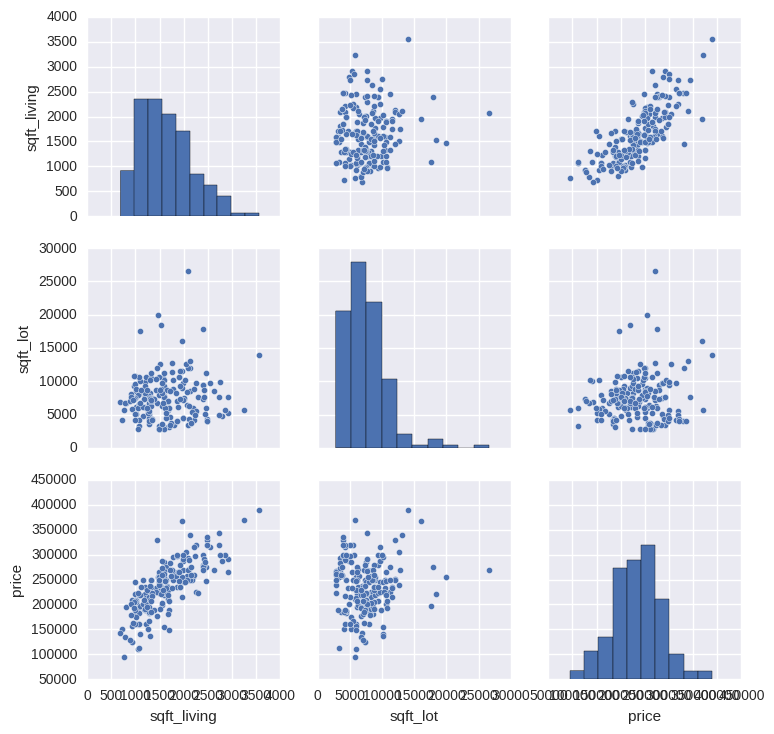

In [156]:
sns.pairplot(cheap[['sqft_living', 'sqft_lot', 'price']])
plt.show()

In [157]:
cheap[['price'] + features].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.591370,0.736833,0.778912,0.086848,0.442597,-0.314724,0.598191,0.736434,0.165257,0.499212,0.005649
bedrooms,0.591370,1.000000,0.612153,0.738366,0.168229,0.259851,-0.131664,0.367648,0.642789,0.259785,0.233425,0.034165
bathrooms,0.736833,0.612153,1.000000,0.784250,-0.109943,0.595748,-0.406297,0.492447,0.740822,0.167618,0.515813,0.048398
sqft_living,0.778912,0.738366,0.784250,1.000000,0.073049,0.415110,-0.226197,0.534656,0.865886,0.360545,0.309551,0.031500
sqft_lot,0.086848,0.168229,-0.109943,0.073049,1.000000,-0.368365,0.184283,0.107386,0.045556,0.059334,-0.201105,-0.011491
floors,0.442597,0.259851,0.595748,0.415110,-0.368365,1.000000,-0.407258,0.287810,0.560805,-0.225800,0.499556,0.098449
condition,-0.314724,-0.131664,-0.406297,-0.226197,0.184283,-0.407258,1.000000,-0.382125,-0.306703,0.125120,-0.710672,-0.066806
grade,0.598191,0.367648,0.492447,0.534656,0.107386,0.287810,-0.382125,1.000000,0.557067,0.017282,0.526328,-0.007228
sqft_above,0.736434,0.642789,0.740822,0.865886,0.045556,0.560805,-0.306703,0.557067,1.000000,-0.154405,0.377316,0.002527
sqft_basement,0.165257,0.259785,0.167618,0.360545,0.059334,-0.225800,0.125120,0.017282,-0.154405,1.000000,-0.092155,0.057504


In [158]:
from sklearn.model_selection import cross_val_score

https://ru.wikipedia.org/wiki/Коэффициент_детерминации

https://ru.wikipedia.org/wiki/Корреляция

In [42]:
regr = linear_model.LinearRegression()
curr_feature_set = ['sqft_living']
current_score = np.mean(cross_val_score(regr, cheap[curr_feature_set], cheap['price'], cv=5, scoring='r2'))
secondary_features = ['bedrooms', 
                      'bathrooms', 
                      'sqft_lot', 
                      'floors', 
                      'condition', 
                      'grade', 
                      'sqft_above', 
                      'sqft_basement', 
                      'yr_built', 
                      'yr_renovated']
feature_r2_scores = [current_score]
while True:
    r2_scores = []
    for feature in secondary_features:
        regr = linear_model.LinearRegression()
        r2_scores.append((feature, np.mean(cross_val_score(regr, cheap[curr_feature_set + [feature]], cheap['price'], cv=10, scoring='r2'))))
    r2_scores.sort(key=lambda x: x[1], reverse=True)
    top_feature = r2_scores[0]
    if current_score < top_feature[1]:
        current_score = top_feature[1]
        curr_feature_set.append(top_feature[0])
        feature_r2_scores.append(current_score)
        secondary_features.remove(top_feature[0])
    else: break

In [40]:
curr_feature_set

['sqft_living',
 'yr_built',
 'bathrooms',
 'condition',
 'yr_renovated',
 'sqft_basement']

In [43]:
feature_r2_scores

[0.51859861876161228,
 0.61045117225179724,
 0.62034177736166374,
 0.62483564208697928,
 0.62704194522893897,
 0.62879711101097147]

In [160]:
reg_multiple = linear_model.LinearRegression()
reg_multiple.fit(X_train[curr_feature_set], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [161]:
print('Обучающая выборка')
print('MAE LinearRegression с одним признаком:\t\t %d' % mean_absolute_error(y_train, reg_one.predict(X_train[['sqft_living']])))
print('MAE LinearRegression с многими признаками:\t %d' % mean_absolute_error(y_train, reg_m.predict(X_train)))
print('MAE Lasso с многими признаками:\t\t\t %d' % mean_absolute_error(y_train, reg_lasso.predict(scaler.transform(X_train))))
print('MAE LinearRegression с отобранными признаками:\t %d' % mean_absolute_error(y_train, reg_multiple.predict(X_train[curr_feature_set])))
print('Тестовая выборка')
print('MAE LinearRegression с одним признаком:\t\t %d' % mean_absolute_error(y_test, reg_one.predict(X_test[['sqft_living']])))
print('MAE LinearRegression с многими признаками:\t %d' % mean_absolute_error(y_test, reg_m.predict(X_test)))
print('MAE Lasso с многими признаками:\t\t\t %d' % mean_absolute_error(y_test, reg_lasso.predict(scaler.transform(X_test))))
print('MAE LinearRegression с отобранными признаками:\t %d' % mean_absolute_error(y_test, reg_multiple.predict(X_test[curr_feature_set])))

Обучающая выборка
MAE LinearRegression с одним признаком:		 26520
MAE LinearRegression с многими признаками:	 21559
MAE Lasso с многими признаками:			 22273
MAE LinearRegression с отобранными признаками:	 22062
Тестовая выборка
MAE LinearRegression с одним признаком:		 25303
MAE LinearRegression с многими признаками:	 22187
MAE Lasso с многими признаками:			 21526
MAE LinearRegression с отобранными признаками:	 20162


In [162]:
# Добавление категориальных фич
# Сделаем одну регрессионную модель для всех районов (zipcodes)
# Затем добавим zipcode как категориальный признак

In [180]:
X_train, X_test, y_train, y_test = \
    train_test_split(df[curr_feature_set], df[['price']], test_size=0.33, random_state=42)

In [181]:
reg = linear_model.LinearRegression()
reg.fit(X_train[curr_feature_set], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [182]:
print('Обучающая выборка')
print('MAE LinearRegression с многими признаками:\t %d' % mean_absolute_error(y_train, reg.predict(X_train)))
print('Тестовая выборка')
print('MAE LinearRegression с многими признаками:\t %d' % mean_absolute_error(y_test, reg.predict(X_test)))

Обучающая выборка
MAE LinearRegression с многими признаками:	 162981
Тестовая выборка
MAE LinearRegression с многими признаками:	 168846


array([[  2.76648749e+02,  -2.56242508e+03,   6.04508727e+04,
          1.34314206e+04,   3.50149436e+01,  -4.33948099e+01,
          2.93117786e+02]])

In [170]:
from sklearn.preprocessing import LabelBinarizer

In [171]:
binarizer = LabelBinarizer()

In [172]:
binarizer.fit(df.zipcode)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [173]:
df_extended = pd.concat([df, pd.DataFrame(binarizer.transform(df.zipcode), columns=map(str, range(70)))], axis=1)

In [174]:
features_extended = curr_feature_set + map(str, range(70))

In [175]:
X_train, X_test, y_train, y_test = \
    train_test_split(df_extended[features_extended], df_extended[['price']], test_size=0.33, random_state=42)

In [176]:
reg_extended = linear_model.LinearRegression()
reg_extended.fit(X_train[features_extended], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [177]:
print('Обучающая выборка')
print('MAE LinearRegression с многими признаками:\t %d' % mean_absolute_error(y_train, reg_extended.predict(X_train)))
print('Тестовая выборка')
print('MAE LinearRegression с многими признаками:\t %d' % mean_absolute_error(y_test, reg_extended.predict(X_test)))

Обучающая выборка
MAE LinearRegression с многими признаками:	 107101
Тестовая выборка
MAE LinearRegression с многими признаками:	 110923
